Ler wav
Fazer o especro do sinal
Filtro passa baixo
    Desenhar o filtro
    Aplicar o filtro
    Espectro

In [3]:
#fs, dados = wavefile.read('   .wav')
#duracao = len(dados)/fs
#t = np.array(0,duracao,1/fs), 1/fs = TS período de amaostra

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [6]:
fs, dados = wavfile.read('FalaSala.wav')

C:\Users\tiago\AppData\Local\Temp\ipykernel_15148\1718529783.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, dados = wavfile.read('FalaSala.wav')


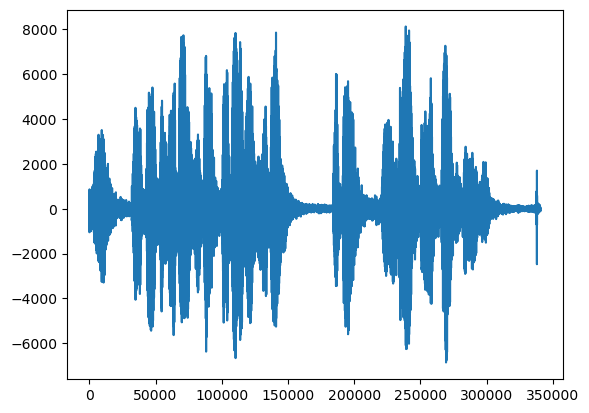

In [7]:
plt.plot(dados)

In [44]:
t = np.arange(0, len(dados)/fs-1/fs, 1/fs)

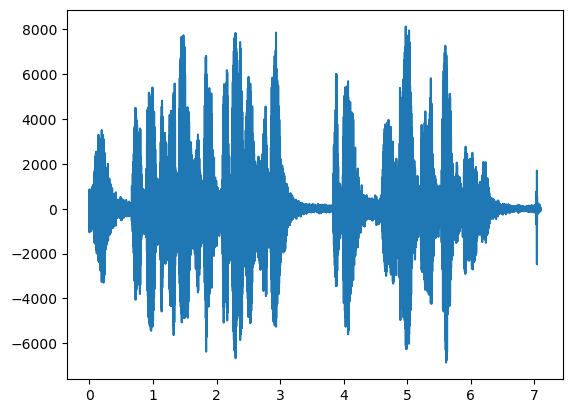

In [46]:
plt.plot(t, dados)

In [48]:
#fazer o espectro
X = np.fft.fft(dados)/len(dados)


In [50]:
f = np.arange(len(X)) * fs / len(X)

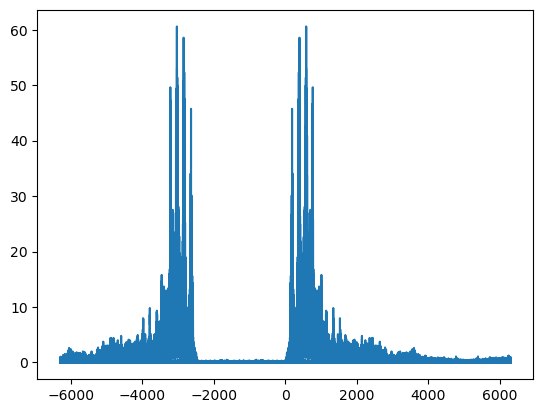

In [52]:
plt.plot(f, np.abs(X))
#FS = 48000HZ
#fmax = FS/2 = 24000HZ

In [54]:
from scipy import signal

In [56]:
fc = 8000 #frequencia de corte do filtro
numtaps = 101 #numero de coeficientes
bk = signal.firwin(numtaps, fc, fs = fs) #cria um filtro FIR passa baixo

In [58]:
f1, H1 = signal.freqz(bk, fs = fs) # calcular a resposta em frequencia

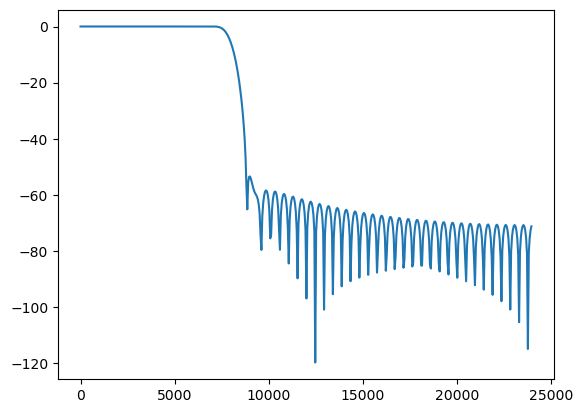

In [60]:
#plt.plot(f1, np.abs(H1)) #visualizaçao do modulo da resposta em frequancia |H(w)|
plt.plot(f1, 20*np.log10((np.abs(H1)))) #visualizaçao do modulo da resposta em frequancia |H(w)| dB

In [62]:
y = signal.lfilter(bk, [1], dados)

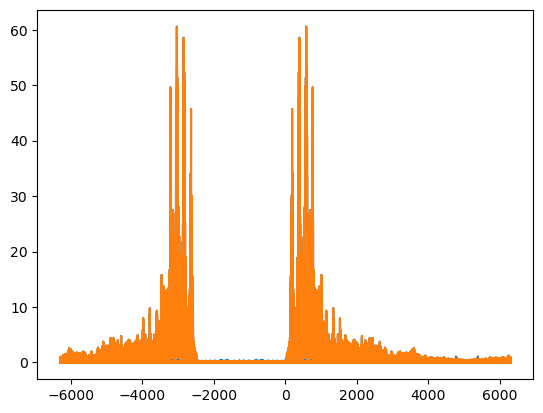

In [64]:
Y = np.fft.fft(y)/len(y)
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
#plt.axis([6000,1000],[0,10])

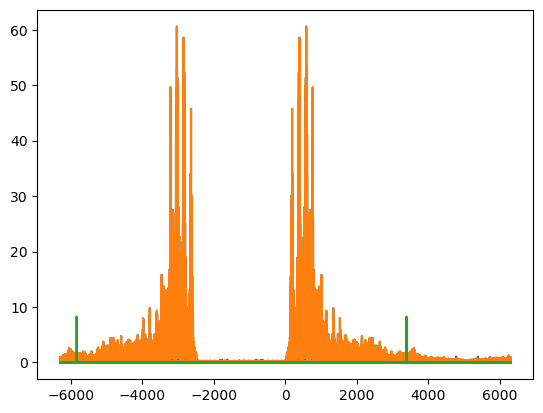

In [70]:
portadora = 20 * np.cos(2*np.pi*16000*t)
Z = np.fft.fft(portadora/len(portadora))
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))

In [ ]:
novoSinal = y*portadora

In [ ]:
N = np.fft.fft(novoSinal/len(novoSinal))/20
plt.plot(f, np.abs(X))
plt.plot(f, np.abs(Y))
plt.plot(f, np.abs(Z))